In [2]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import prince

In [3]:
df=pd.read_excel('./../myproj/Survey.xlsx',nrows=830)

In [4]:
X=df[['Location(From which state you are?)',
      'Is it difficult to get essentials(food/medicine)?',
      'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
      'Has your sleep cycle changed drastically?',
      'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
      'Are you stuck somewhere alone without support from friends or family? ',
      'Do you miss hanging out with people outside of your house?',
      'Have you been affected by not being able to visit religious places?',
      'How often do you eat outside food? (per week) ',
      'Are you in a containment zone? ',
      'Do you have any of the following conditions?',
      'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? ']]

In [5]:
mca = prince.MCA(
    n_components=12,
    random_state=0,
    n_iter=15
)
main_mca = mca.fit_transform(X)

In [6]:
main_mca

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.379248,-0.152596,-0.001974,-0.162509,-0.400226,0.151638,0.032946,-0.765958,1.117419,0.512939,-0.059099,1.0
1,-0.154285,-0.138834,-0.141444,-0.237680,-0.201238,-0.211144,-0.084444,-0.588252,0.007806,0.392107,-0.543286,1.0
2,-0.312588,-0.183541,-0.097553,-0.162981,0.316878,-0.545469,-0.583849,0.442651,-0.141176,0.186453,-0.489354,1.0
3,-0.438834,-0.271185,-0.622149,0.650563,0.304616,-0.037370,0.574396,-0.366633,0.033109,0.032382,0.034426,1.0
4,-0.125750,-0.089663,-0.128442,-0.318683,-0.214546,-0.053049,-0.041340,-0.648466,0.339715,-0.440851,0.081477,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.679370,0.126410,0.561952,-0.126865,0.226834,-0.036404,0.328330,-0.029014,0.098280,-0.052155,0.015691,1.0
826,0.755279,-0.058319,0.088259,-0.132988,0.051607,0.158254,0.032158,0.144356,-0.241675,0.150739,0.211813,1.0
827,0.672950,-0.153296,-0.297971,0.380375,0.567973,0.080241,0.138735,-0.108833,-0.191168,0.100115,-0.176499,1.0
828,0.426213,-0.150528,0.022933,-0.071568,0.058441,-0.157470,-0.227813,0.020704,0.086797,0.057395,0.030527,1.0


In [7]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
y_kmeans=kmeans.fit_predict(main_mca)

In [32]:
type(main_mca)

pandas.core.frame.DataFrame

In [33]:
main_mca.columns

RangeIndex(start=0, stop=12, step=1)

In [34]:
main_mca.rename(columns={0:'Location(From which state you are?)',
      1:'Is it difficult to get essentials(food/medicine)?',
      2:'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
      3:'Has your sleep cycle changed drastically?',
      4:'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
      5:'Are you stuck somewhere alone without support from friends or family? ',
      6:'Do you miss hanging out with people outside of your house?',
      7:'Have you been affected by not being able to visit religious places?',
      8:'How often do you eat outside food? (per week) ',
      9:'Are you in a containment zone? ',
      10:'Do you have any of the following conditions?',
      11:'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus? '})

,Location(From which state you are?),Is it difficult to get essentials(food/medicine)?,Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?,Has your sleep cycle changed drastically?,Have you ever felt afraid or anxious to go to hospital during this pandemic?,Are you stuck somewhere alone without support from friends or family?,Do you miss hanging out with people outside of your house?,Have you been affected by not being able to visit religious places?,How often do you eat outside food? (per week),Are you in a containment zone?,Do you have any of the following conditions?,"Have you felt frustrated by having your activities, major life events or opportunities affected by the virus?"
0,0.379248,-0.152596,-0.001974,-0.162509,-0.400226,0.151638,0.032946,-0.765958,1.117419,0.512939,-0.059099,1.0
1,-0.154285,-0.138834,-0.141444,-0.237680,-0.201238,-0.211144,-0.084444,-0.588252,0.007806,0.392107,-0.543286,1.0
2,-0.312588,-0.183541,-0.097553,-0.162981,0.316878,-0.545469,-0.583849,0.442651,-0.141176,0.186453,-0.489354,1.0
3,-0.438834,-0.271185,-0.622149,0.650563,0.304616,-0.037370,0.574396,-0.366633,0.033109,0.032382,0.034426,1.0
4,-0.125750,-0.089663,-0.128442,-0.318683,-0.214546,-0.053049,-0.041340,-0.648466,0.339715,-0.440851,0.081477,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.679370,0.126410,0.561952,-0.126865,0.226834,-0.036404,0.328330,-0.029014,0.098280,-0.052155,0.015691,1.0
826,0.755279,-0.058319,0.088259,-0.132988,0.051607,0.158254,0.032158,0.144356,-0.241675,0.150739,0.211813,1.0
827,0.672950,-0.153296,-0.297971,0.380375,0.567973,0.080241,0.138735,-0.108833,-0.191168,0.100115,-0.176499,1.0
828,0.426213,-0.150528,0.022933,-0.071568,0.058441,-0.157470,-0.227813,0.020704,0.086797,0.057395,0.030527,1.0


In [35]:
mca = prince.MCA(
    n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
    engine='auto',
     random_state=42
)
mca = mca.fit_transform(X)

In [36]:
results=pd.DataFrame(mca)
results=results.rename(columns={0:'mca1',
      1:'mca2'})
results

,mca1,mca2
0,0.379248,-0.152596
1,-0.154285,-0.138834
2,-0.312588,-0.183541
3,-0.438834,-0.271185
4,-0.125750,-0.089663
...,...,...
825,0.679370,0.126410
826,0.755279,-0.058319
827,0.672950,-0.153296
828,0.426213,-0.150528


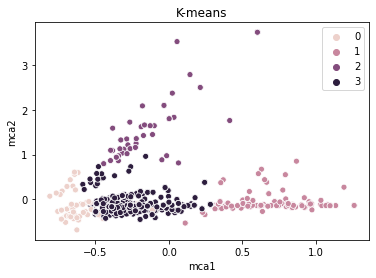

In [37]:
sns.scatterplot(x='mca1',y='mca2',hue=y_kmeans,data=results)
plt.xlabel('mca1')
plt.ylabel('mca2')
plt.title('K-means')
plt.show()

In [40]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
y_kmeans=kmeans.fit_predict(main_mca)

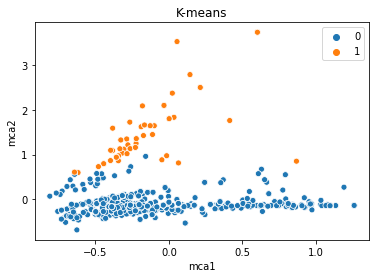

In [41]:
sns.scatterplot(x='mca1',y='mca2',hue=y_kmeans,data=results)
plt.xlabel('mca1')
plt.ylabel('mca2')
plt.title('K-means')
plt.show()

In [43]:
kmeans.inertia_

1349.8806177563438

In [45]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
y_kmeans=kmeans.fit_predict(main_mca)

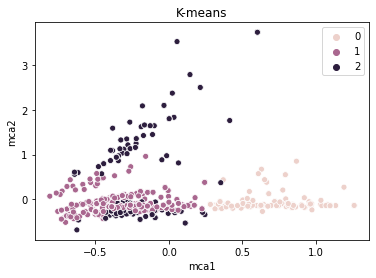

In [46]:
sns.scatterplot(x='mca1',y='mca2',hue=y_kmeans,data=results)
plt.xlabel('mca1')
plt.ylabel('mca2')
plt.title('K-means')
plt.show()